In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from src.tools.visualization import read_and_visualize_tiff, display_image_with_histogram
import numpy as np
import cv2

Image shape: (1600, 2560)
Data type: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 2.16


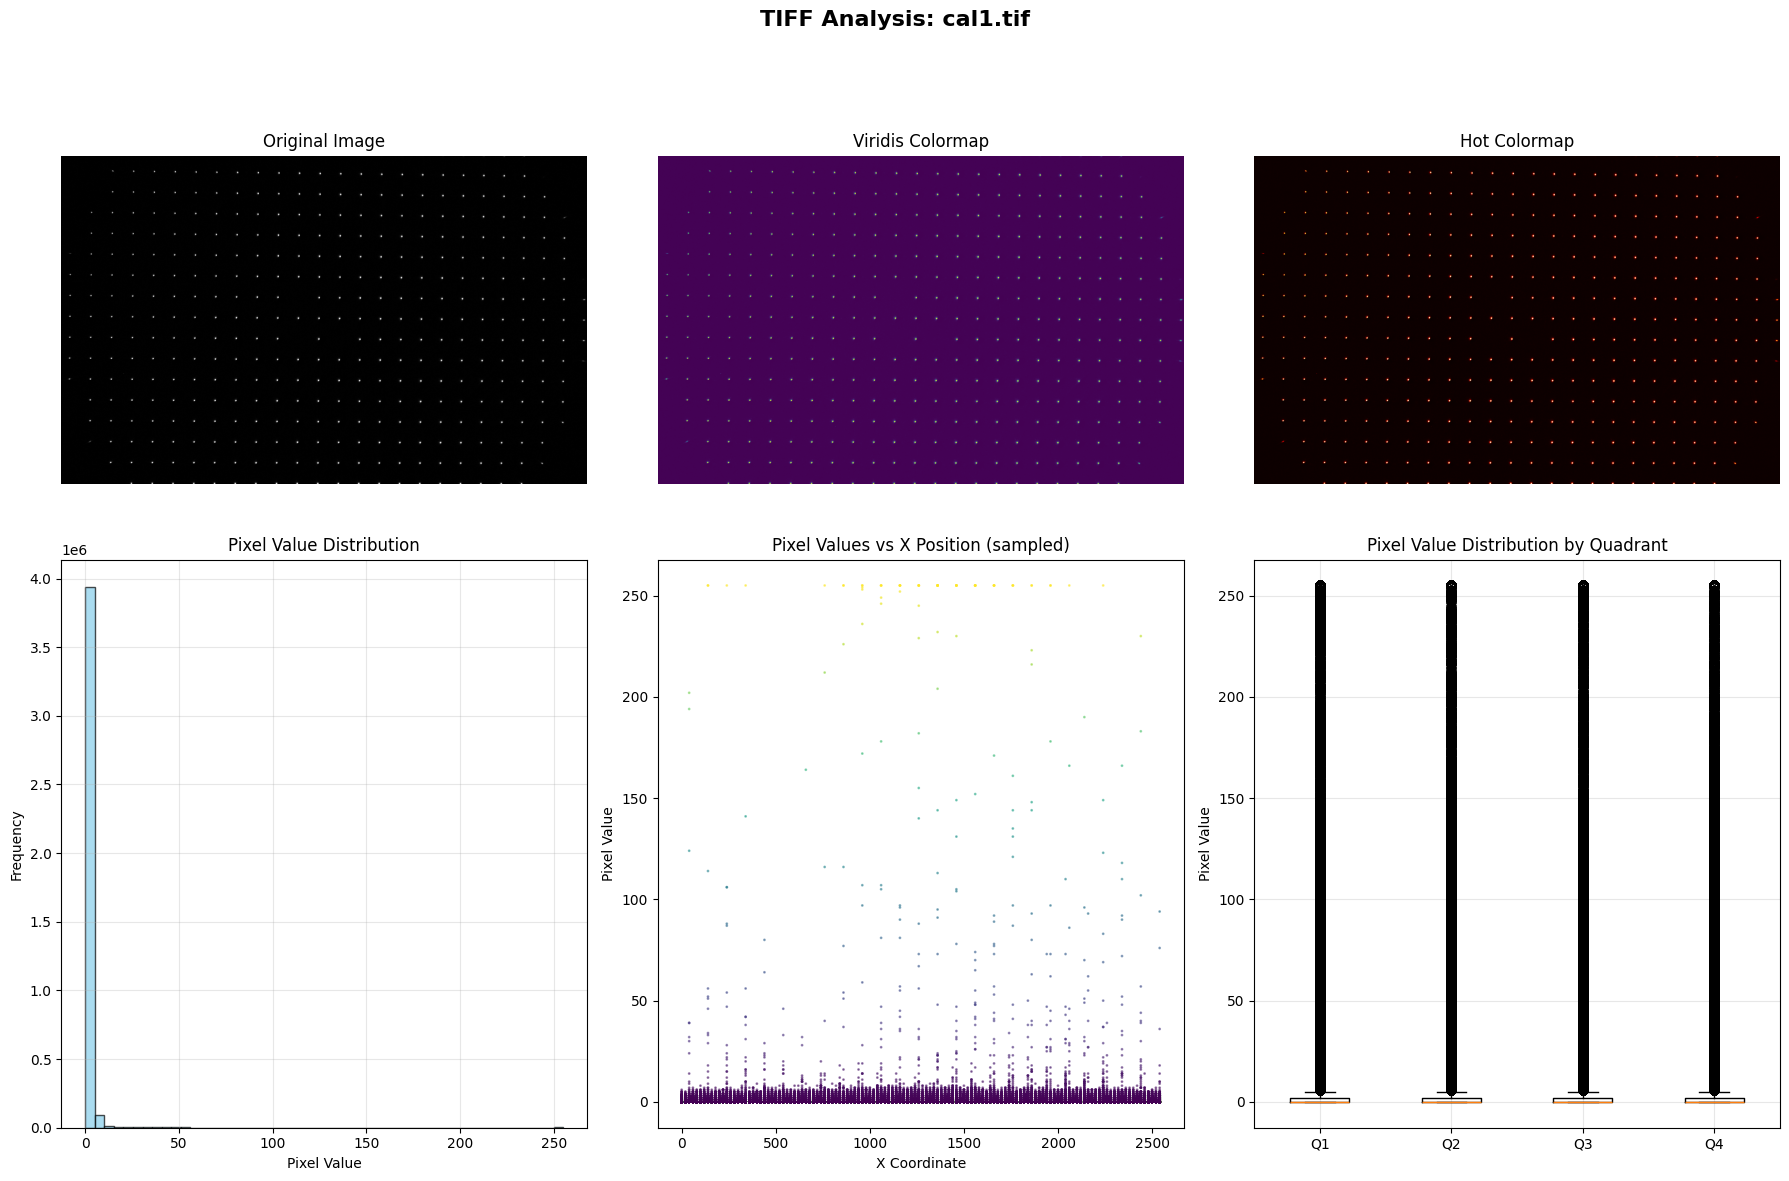

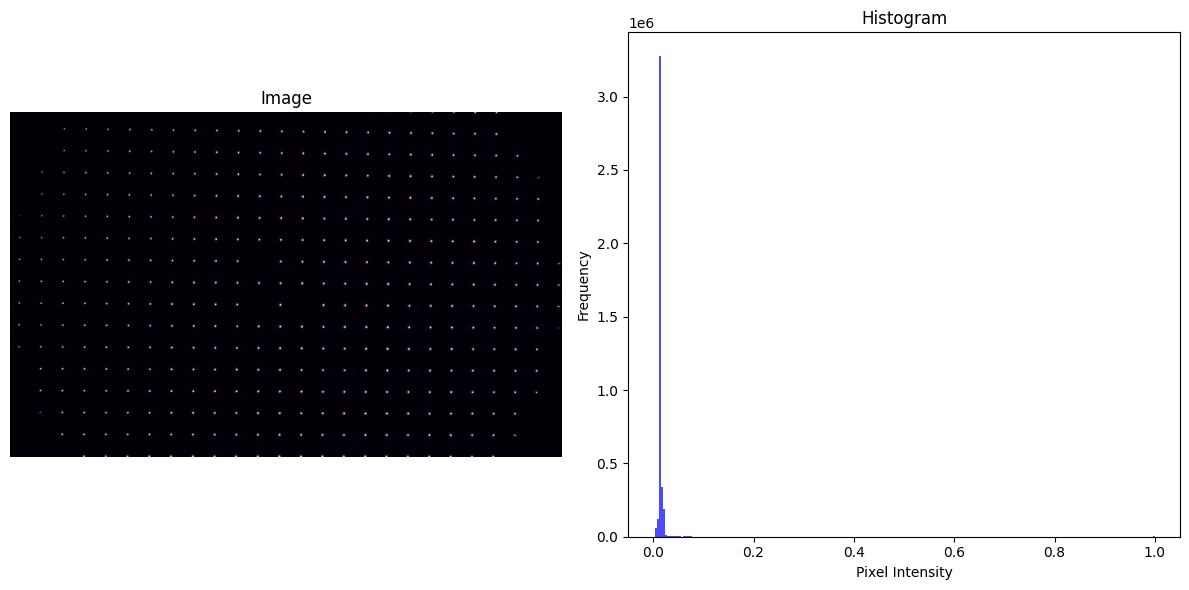

In [ ]:
# path = 'sample_calibration_images/single_target/set1'
path = 'sample_calibration_images/moving_target/set1'

img_data = read_and_visualize_tiff(path, "cal1.tif")
img_data = cv2.fastNlMeansDenoising(img_data, None, 5)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(128,128))
img_data = clahe.apply(img_data)
# img_data = cv2.equalizeHist(img_data) only needed for images with poor contrast

img_data = img_data.astype(np.float32)
img_data = (img_data - img_data.min()) / (img_data.max() - img_data.min())

display_image_with_histogram(img_data)

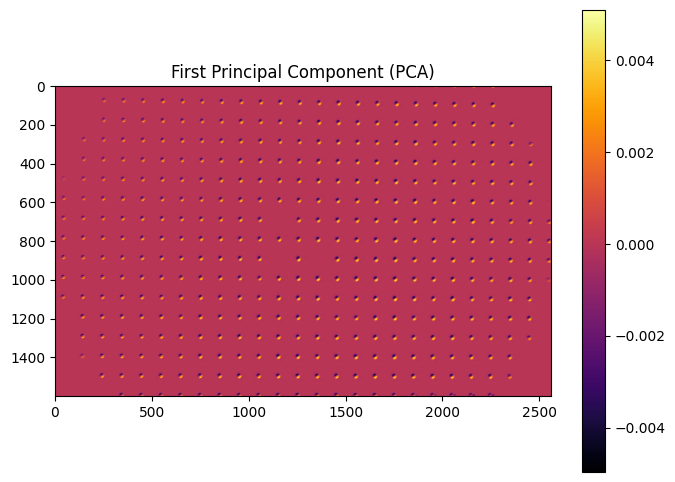

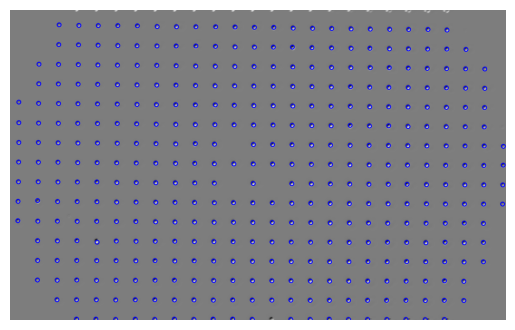

In [ ]:
from src.pca_detection import detect_circles

points = detect_circles(img_data)
np.savetxt("output/detected_points.txt", points, fmt="%.6f", delimiter=",")